In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP):
    # Create empty matrices for Poisson process and for compensated Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    Xc = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)

    Z = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])

    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1] = time[i] +dt

    paths = {"time":time,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 30
    xiP= 1

    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

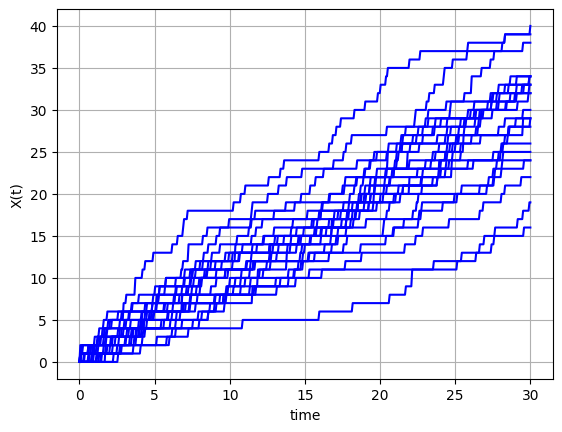

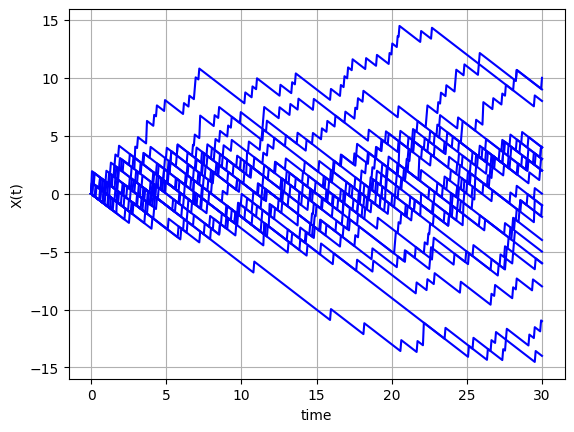

In [3]:
mainCalculation()